In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split, GridSearchCV, cross_val_score, validation_curve, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix

In [2]:
#create folds
def cross_validation_split(X, Y, folds, seed): 
    X_split=[]
    Y_split=[]
    Y=np.array(Y)
    X_copy=X
    Y_copy=Y
    n=int(np.shape(X)[0]/folds)
    seed1=seed
    for i in range(folds):
        index=random.Random(seed1).sample(range(np.shape(X_copy)[0]), n)
        #variables X
        X_split.append(X_copy[index][:])
        X_copy=np.delete(X_copy, index, 0)
        #label Y
        Y_split.append(Y_copy[index])
        Y_copy=np.delete(Y_copy, index)
    
    return X_split, Y_split    

In [3]:
#combining folds in order to create a number of datasets equal to the number of folds
def create_datasets(X, Y): #it creates a list with dataset for cross validation
    training_X=[]
    test_X=[]
    training_Y=[]
    test_Y=[]
    for i in range(len(X)):
        testX=X[i]
        test_X.append(testX)
        test_Y.append(Y[i])
        for t in range(len(X)):
            if t==i:
                continue
                
            elif t==0:
                X1=X[t]
                Y1=Y[t]
                
            elif t==1 and i==0:
                X1=X[t]
                Y1=Y[t]
            
            else:
                X1=np.vstack((X1, X[t]))
                Y1=np.hstack((Y1, Y[t]))
                
        training_X.append(X1)
        training_Y.append(Y1)
                
    return training_X, training_Y, test_X, test_Y    

In [4]:
def create_labels(Y_train, Y_test):
    
    Y_train=pd.DataFrame(Y_train)
    
    Y_test=pd.DataFrame(Y_test)


    #class 1
    Y_train.loc[Y_train["Cover_Type"]==1, "New_label_1"]=1
    Y_train.loc[Y_train["Cover_Type"]!=1, "New_label_1"]=-1

    Y_train1=Y_train["New_label_1"]

    Y_test.loc[Y_test["Cover_Type"]==1, "New_label_1"]=1
    Y_test.loc[Y_test["Cover_Type"]!=1, "New_label_1"]=-1

    Y_test1=Y_test["New_label_1"]


    #class 2
    Y_train.loc[Y_train["Cover_Type"]==2, "New_label_2"]=1
    Y_train.loc[Y_train["Cover_Type"]!=2, "New_label_2"]=-1

    Y_train2=Y_train["New_label_2"]

    Y_test.loc[Y_test["Cover_Type"]==2, "New_label_2"]=1
    Y_test.loc[Y_test["Cover_Type"]!=2, "New_label_2"]=-1

    Y_test2=Y_test["New_label_2"]


    #class 3
    Y_train.loc[Y_train["Cover_Type"]==3, "New_label_3"]=1
    Y_train.loc[Y_train["Cover_Type"]!=3, "New_label_3"]=-1

    Y_train3=Y_train["New_label_3"]

    Y_test.loc[Y_test["Cover_Type"]==3, "New_label_3"]=1
    Y_test.loc[Y_test["Cover_Type"]!=3, "New_label_3"]=-1

    Y_test3=Y_test["New_label_3"]


    #class 4
    Y_train.loc[Y_train["Cover_Type"]==4, "New_label_4"]=1
    Y_train.loc[Y_train["Cover_Type"]!=4, "New_label_4"]=-1

    Y_train4=Y_train["New_label_4"]

    Y_test.loc[Y_test["Cover_Type"]==4, "New_label_4"]=1
    Y_test.loc[Y_test["Cover_Type"]!=4, "New_label_4"]=-1

    Y_test4=Y_test["New_label_4"]


    #class 5
    Y_train.loc[Y_train["Cover_Type"]==5, "New_label_5"]=1
    Y_train.loc[Y_train["Cover_Type"]!=5, "New_label_5"]=-1

    Y_train5=Y_train["New_label_5"]

    Y_test.loc[Y_test["Cover_Type"]==5, "New_label_5"]=1
    Y_test.loc[Y_test["Cover_Type"]!=5, "New_label_5"]=-1

    Y_test5=Y_test["New_label_5"]


    #class 6
    Y_train.loc[Y_train["Cover_Type"]==6, "New_label_6"]=1
    Y_train.loc[Y_train["Cover_Type"]!=6, "New_label_6"]=-1

    Y_train6=Y_train["New_label_6"]

    Y_test.loc[Y_test["Cover_Type"]==6, "New_label_6"]=1
    Y_test.loc[Y_test["Cover_Type"]!=6, "New_label_6"]=-1

    Y_test6=Y_test["New_label_6"]


    #class 7
    Y_train.loc[Y_train["Cover_Type"]==7, "New_label_7"]=1
    Y_train.loc[Y_train["Cover_Type"]!=7, "New_label_7"]=-1

    Y_train7=Y_train["New_label_7"]

    Y_test.loc[Y_test["Cover_Type"]==7, "New_label_7"]=1
    Y_test.loc[Y_test["Cover_Type"]!=7, "New_label_7"]=-1

    Y_test7=Y_test["New_label_7"]
    
    return Y_train1, Y_test1, Y_train2, Y_test2, Y_train3, Y_test3, Y_train4, Y_test4, Y_train5, Y_test5, Y_train6, Y_test6, Y_train7, Y_test7

In [5]:
#function to compute error
def compute_error(data_frame, Y):       
    array=np.array(data_frame)
    predi=np.argmax(array,axis=1)
    predi1=predi+1
    error= (sum(np.not_equal(predi1, Y).astype(int)))/np.shape(Y)[0] 
    return error, predi

In [6]:
forest= pd.read_csv("C:\\Users\\Stefano\\Desktop\\DSE\\MACHINE LEARNING\\.ipynb_checkpoints\\covtype.csv")
forest.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [7]:
forest.shape

(581012, 55)

In [8]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [9]:
forest.describe(include="all")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
correlation_matrix= pd.DataFrame(forest.corr())
correlation_matrix.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


(array([[<AxesSubplot:title={'center':'Elevation'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Aspect'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Slope'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'Hillshade_9am'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Hillshade_Noon'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Hillshade_3pm'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>]],
       dtype=object))

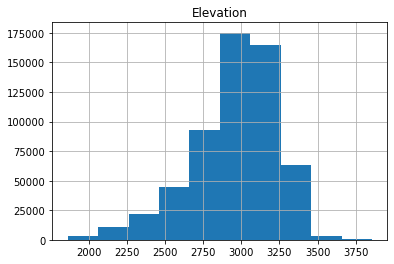

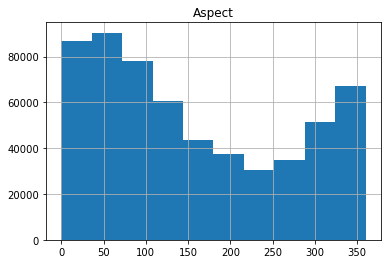

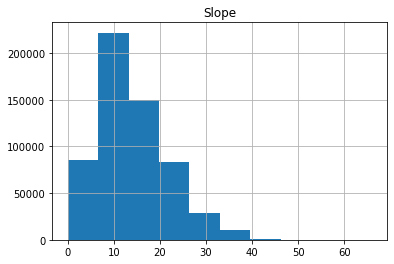

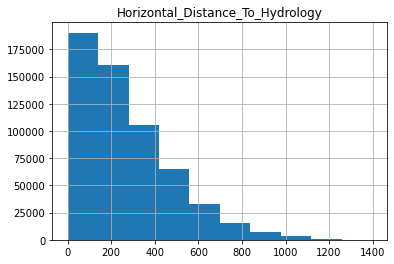

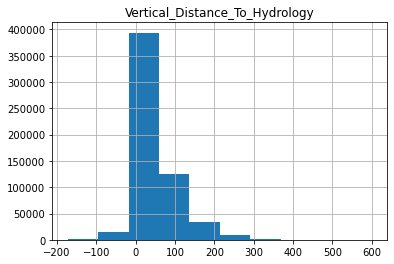

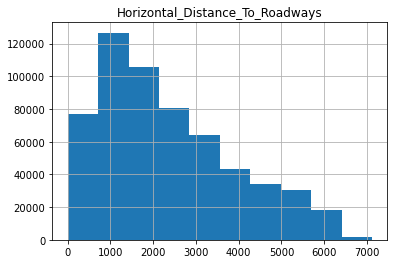

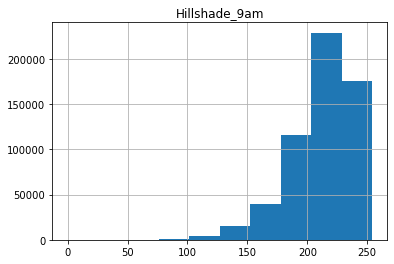

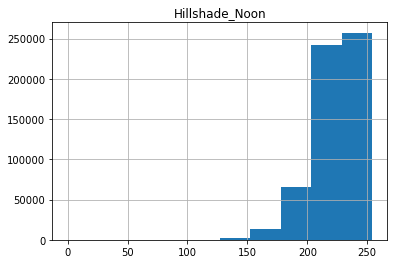

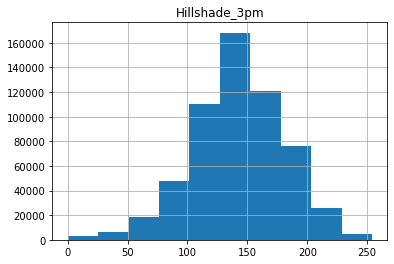

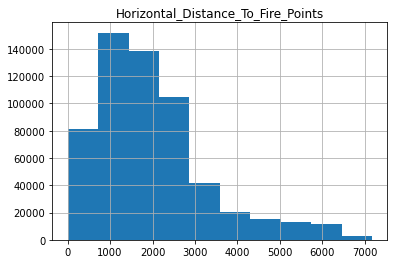

In [11]:
forest.hist(column="Elevation"), forest.hist(column="Aspect"), forest.hist(column="Slope"), forest.hist(column="Horizontal_Distance_To_Hydrology"), forest.hist(column="Vertical_Distance_To_Hydrology"), forest.hist(column="Horizontal_Distance_To_Roadways"), forest.hist(column="Hillshade_9am"), forest.hist(column="Hillshade_Noon"), forest.hist(column="Hillshade_3pm"), forest.hist(column="Horizontal_Distance_To_Fire_Points") 

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

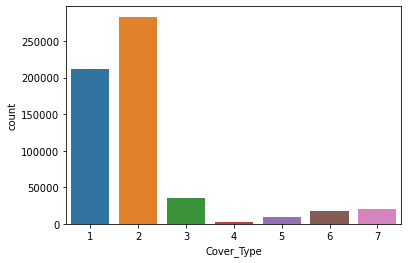

In [12]:
sns.countplot(x="Cover_Type", data=forest) #counting the numbers of observations for the y variable "cover type"

In [13]:
forest.isna().sum() #there are no null values

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [14]:
#creating X matrix and Y vector of labels
X= forest.drop(columns=["Cover_Type"]).values
Y=forest["Cover_Type"]

In [15]:
np.unique(Y.values, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([211840, 283301,  35754,   2747,   9493,  17367,  20510],
       dtype=int64))

In [16]:
#function which implement AdaBoost and makes also predictions 
def ada_boost(n_stumps, X_train, X_test, Y_test, Y_train1, Y_train2, Y_train3, Y_train4, Y_train5, Y_train6, Y_train7):

    #weights for each class
    w1=[]
    w2=[]
    w3=[]
    w4=[]
    w5=[]
    w6=[]
    w7=[]

    #segni per ogni classe
    sgn1=np.full(len(Y_train1),0)
    sgn2=np.full(len(Y_train1),0)
    sgn3=np.full(len(Y_train1),0)
    sgn4=np.full(len(Y_train1),0)
    sgn5=np.full(len(Y_train1),0)
    sgn6=np.full(len(Y_train1),0)
    sgn7=np.full(len(Y_train1),0)

    #initial probabilities equal for all classes
    P1=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P2=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P3=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P4=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P5=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P6=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])
    P7=np.full(np.shape(X_train)[0],1/np.shape(X_train)[0])

    #stumps for each class
    stumps1=[]
    stumps2=[]
    stumps3=[]
    stumps4=[]
    stumps5=[]
    stumps6=[]
    stumps7=[]



    #class 1
    for t in range(n_stumps[0]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit1=weak_learner.fit(X_train, Y_train1, sample_weight=P1)
        stumps1.append(fit1)
        predictions1=fit1.predict(X_train)
        error1=sum(P1*(np.not_equal(Y_train1, predictions1).astype(int)))
        if error1 == 0.5:
            stumps1=stumps1[0:t-1]
            break
        if error1 == 1:
            stumps1 = [fit1]
            sgn1 = -(predictions1)
            break
        if error1 == 0:
            stumps1 = [fit1]
            sgn1=predictions1
            break
        w1.append(0.5*(np.log((1-error1)/error1)))
        sgn1=sgn1+(w1[t]*predictions1)
        P1=(P1*np.exp(-1*w1[t]*Y_train1*predictions1))/sum((np.exp(-1*w1[t]*Y_train1*predictions1))*P1)
    sgn1=sgn1/len(stumps1)
    
    
    #class 2
    for t in range(n_stumps[1]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit2=weak_learner.fit(X_train, Y_train2, sample_weight=P2)
        stumps2.append(fit2)
        predictions2=fit2.predict(X_train)
        error2=sum(P2*(np.not_equal(Y_train2, predictions2).astype(int)))
        if error2 == 0.5:
            stumps2=stumps2[0:t-1]
            break
        if error2 == 1:
            stumps2 = [fit2]
            sgn2 = -(predictions2)
            break
        if error2 == 0:
            stumps2 = [fit2]
            sgn2=predictions2
            break
        w2.append(0.5*(np.log((1-error2)/error2)))
        sgn2=sgn2+(w2[t]*predictions2)
        P2=(P2*np.exp(-1*w2[t]*Y_train2*predictions2))/sum((np.exp(-1*w2[t]*Y_train2*predictions2))*P2)
    sgn2=sgn2/len(stumps2)   
    
    #class 3
    for t in range(n_stumps[2]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit3=weak_learner.fit(X_train, Y_train3, sample_weight=P3)
        stumps3.append(fit3)
        predictions3=fit3.predict(X_train)
        error3=sum(P3*(np.not_equal(Y_train3, predictions3).astype(int)))
        if error3 == 0.5:
            stumps3=stumps3[0:t-1]
            break
        if error3 == 1:
            stumps3 = [fit3]
            sgn3 = -(predictions3)
            break
        if error3 == 0:
            stumps3 = [fit3]
            sgn3=predictions3
            break
        w3.append(0.5*(np.log((1-error3)/error3)))
        sgn3=sgn3+(w3[t]*predictions3)
        P3=(P3*np.exp(-1*w3[t]*Y_train3*predictions3))/sum((np.exp(-1*w3[t]*Y_train3*predictions3))*P3)
    sgn3=sgn3/len(stumps3)   
    
    #class 4
    for t in range(n_stumps[3]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit4=weak_learner.fit(X_train, Y_train4, sample_weight=P4)
        stumps4.append(fit4)
        predictions4=fit4.predict(X_train)
        error4=sum(P4*(np.not_equal(Y_train4, predictions4).astype(int)))
        if error4 == 0.5:
            stumps4=stumps4[0:t-1]
            break
        if error4 == 1:
            stumps4 = [fit4]
            sgn4 = -(predictions4)
            break
        if error4 == 0:
            stumps4 = [fit4]
            sgn4=predictions4
            break
        w4.append(0.5*(np.log((1-error4)/error4)))
        sgn4=sgn4+(w4[t]*predictions4)
        P4=(P4*np.exp(-1*w4[t]*Y_train4*predictions4))/sum((np.exp(-1*w4[t]*Y_train4*predictions4))*P4)
    sgn4=sgn4/len(stumps4)   
    
    #class 5
    for t in range(n_stumps[4]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit5=weak_learner.fit(X_train, Y_train5, sample_weight=P5)
        stumps5.append(fit5)
        predictions5=fit5.predict(X_train)
        error5=sum(P5*(np.not_equal(Y_train5, predictions5).astype(int)))
        if error5 == 0.5:
            stumps5=stumps5[0:t-1]
            break
        if error5 == 1:
            stumps5 = [fit5]
            sgn5 = -(predictions5)
            break
        if error5 == 0:
            stumps5 = [fit5]
            sgn5=predictions5
            break
        w5.append(0.5*(np.log((1-error5)/error5)))
        sgn5=sgn5+(w5[t]*predictions5)
        P5=(P5*np.exp(-1*w5[t]*Y_train5*predictions5))/sum((np.exp(-1*w5[t]*Y_train5*predictions5))*P5)
    sgn5=sgn5/len(stumps5)    

    #class 6  
    for t in range(n_stumps[5]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit6=weak_learner.fit(X_train, Y_train6, sample_weight=P6)
        stumps6.append(fit6)
        predictions6=fit6.predict(X_train)
        error6=sum(P6*(np.not_equal(Y_train6, predictions6).astype(int)))
        if error6 == 0.5:
            stumps6=stumps6[0:t-1]
            break
        if error6 == 1:
            stumps6 = [fit6]
            sgn6 = -(predictions6)
            break
        if error6 == 0:
            stumps6 = [fit6]
            sgn6=predictions6
            break
        w6.append(0.5*(np.log((1-error6)/error6)))
        sgn6=sgn6+(w6[t]*predictions6)
        P6=(P6*np.exp(-1*w6[t]*Y_train6*predictions6))/sum((np.exp(-1*w6[t]*Y_train6*predictions6))*P6)
    sgn6=sgn6/len(stumps6)       
    
    #class 7
    for t in range(n_stumps[6]):
        weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
        fit7=weak_learner.fit(X_train, Y_train7, sample_weight=P7)
        stumps7.append(fit7)
        predictions7=fit7.predict(X_train)
        error7=sum(P7*(np.not_equal(Y_train7, predictions7).astype(int)))
        if error7 == 0.5:
            stumps7=stumps7[0:t-1]
            break
        if error7 == 1:
            stumps7 = [fit7]
            sgn7 = -(predictions7)
            break
        if error7 == 0:
            stumps7 = [fit7]
            sgn7=predictions7
            break
        w7.append(0.5*(np.log((1-error7)/error7)))
        sgn7=sgn7+(w7[t]*predictions7)
        P7=(P7*np.exp(-1*w7[t]*Y_train7*predictions7))/sum((np.exp(-1*w7[t]*Y_train7*predictions7))*P7)
    sgn7=sgn7/len(stumps7)

    #data frame with sign for each class computed on training set
    sgn_classes=pd.DataFrame(sgn1, columns=["sgn1"])
    sgn_classes["sgn2"]=sgn2
    sgn_classes["sgn3"]=sgn3
    sgn_classes["sgn4"]=sgn4
    sgn_classes["sgn5"]=sgn5
    sgn_classes["sgn6"]=sgn6
    sgn_classes["sgn7"]=sgn7
    
    
    #predictions test set
    #class1
    sgn_test1=np.full(len(Y_test),0)
    sgn_test2=np.full(len(Y_test),0)
    sgn_test3=np.full(len(Y_test),0)
    sgn_test4=np.full(len(Y_test),0)
    sgn_test5=np.full(len(Y_test),0)
    sgn_test6=np.full(len(Y_test),0)
    sgn_test7=np.full(len(Y_test),0)


    if error1 == 0:
        predictions_test1=stumps1[0].predict(X_test)
        sgn_test1=predictions_test1
        
    if error1 == 1:
        predictions_test1=stumps1[0].predict(X_test)
        sgn_test1= -(predictions_test1)
        
    else:
        for t in range(len(stumps1)):
            predictions_test1=stumps1[t].predict(X_test)
            sgn_test1=sgn_test1+(w1[t]*predictions_test1)
        sgn_test1=sgn_test1/len(stumps1)

    #class 2
    if error2 == 0:
        predictions_test2=stumps2[0].predict(X_test)
        sgn_test2=predictions_test2
        
    if error2 == 1:
        predictions_test2=stumps2[0].predict(X_test)
        sgn_test2= -(predictions_test2)
        
    else:
        for t in range(len(stumps2)):
            predictions_test2=stumps2[t].predict(X_test)
            sgn_test2=sgn_test2+(w2[t]*predictions_test2)
        sgn_test2=sgn_test2/len(stumps2)

    #class 3
    if error3 == 0:
        predictions_test=stumps3[0].predict(X_test)
        sgn_test3=predictions_test3
        
    if error3 == 1:
        predictions_test3=stumps3[0].predict(X_test)
        sgn_test3= -(predictions_test3)
        
    else:
        for t in range(len(stumps3)):
            predictions_test3=stumps3[t].predict(X_test)
            sgn_test3=sgn_test3+(w3[t]*predictions_test3)
        sgn_test3=sgn_test3/len(stumps3)

    #class 4
    if error4 == 0:
        predictions_test4=stumps4[0].predict(X_test)
        sgn_test4=predictions_test4
        
    if error4 == 1:
        predictions_test4=stumps4[0].predict(X_test)
        sgn_test4= -(predictions_test4)
        
    else:
        for t in range(len(stumps4)):
            predictions_test4=stumps4[t].predict(X_test)
            sgn_test4=sgn_test4+(w4[t]*predictions_test4)
        sgn_test4=sgn_test4/len(stumps4)

    #class 5
    if error5 == 0:
        predictions_test5=stumps5[0].predict(X_test)
        sgn_test5=predictions_test5
        
    if error5 == 1:
        predictions_test5=stumps5[0].predict(X_test)
        sgn_test5= -(predictions_test5)
        
    else:
        for t in range(len(stumps5)):
            predictions_test5=stumps5[t].predict(X_test)
            sgn_test5=sgn_test5+(w5[t]*predictions_test5)
        sgn_test5=sgn_test5/len(stumps5)

    #class 6
    if error6 == 0:
        predictions_test6=stumps6[0].predict(X_test)
        sgn_test6=predictions_test6
        
    if error6 == 1:
        predictions_test6=stumps6[0].predict(X_test)
        sgn_test6= -(predictions_test6)
        
    else:
        for t in range(len(stumps6)):
            predictions_test6=stumps6[t].predict(X_test)
            sgn_test6=sgn_test6+(w6[t]*predictions_test6)
        sgn_test6=sgn_test6/len(stumps6)

    #class 7
    if error7 == 0:
        predictions_test7=stumps7[0].predict(X_test)
        sgn_test7=predictions_test7
        
    if error7 == 1:
        predictions_test7=stumps7[0].predict(X_test)
        sgn_test7= -(predictions_test7)
        
    else:
        for t in range(len(stumps7)):
            predictions_test7=stumps7[t].predict(X_test)
            sgn_test7=sgn_test7+(w7[t]*predictions_test7)
        sgn_test7=sgn_test7/len(stumps7)
    
    
    sgn_classes_test=pd.DataFrame(sgn_test1, columns=["sgn_test1"])
    sgn_classes_test["sgn_test2"]=sgn_test2
    sgn_classes_test["sgn_test3"]=sgn_test3
    sgn_classes_test["sgn_test4"]=sgn_test4
    sgn_classes_test["sgn_test5"]=sgn_test5
    sgn_classes_test["sgn_test6"]=sgn_test6
    sgn_classes_test["sgn_test7"]=sgn_test7
    
    
    
    return sgn_classes, sgn_classes_test

In [17]:
#creating train and test set
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)
X_split, Y_split= cross_validation_split(Xtrain, Ytrain, 5, 10)
training_X, training_Y, test_X, test_Y= create_datasets(X_split, Y_split)

In [18]:
#grid search
n_stumps=[[10, 8, 20, 70, 60, 50, 40], [50, 70, 30, 15, 20, 25, 30], [300, 400, 160, 30, 50, 60, 70], [400, 400, 400, 400, 400, 400, 400], [500, 600, 400, 100, 150, 170, 180], [150, 100, 200, 600, 500, 400, 300]] 
training_error=[]
test_error=[]
for i in range(len(n_stumps)):
    #X_split, Y_split= cross_validation_split(X_train, Y_train, 5)
    #training_X, training_Y, test_X, test_Y= create_datasets(X_split, Y_split)
    training_error_folds=[]
    test_error_folds=[]
    n=n_stumps[i]
    for t in range(len(training_X)):
        #data for the fold
        X_train=training_X[t]
        Y_train=training_Y[t]
        X_test=test_X[t]
        Y_test=test_Y[t]
        Y_train=pd.DataFrame(Y_train, columns=["Cover_Type"])
        Y_test=pd.DataFrame(Y_test, columns=["Cover_Type"])
        
        #creating binary labels for each class
        Y_train1, Y_test1, Y_train2, Y_test2, Y_train3, Y_test3, Y_train4, Y_test4, Y_train5, Y_test5, Y_train6, Y_test6, Y_train7, Y_test7=create_labels(Y_train, Y_test)
        sgn_classes, sgn_classes_test=ada_boost(n, X_train, X_test, Y_test, Y_train1, Y_train2, Y_train3, Y_train4, Y_train5, Y_train6, Y_train7)
        error_training, predi=compute_error(sgn_classes, Y_train.iloc[:,0])
        error_test, predi=compute_error(sgn_classes_test, Y_test.iloc[:,0])
        
        training_error_folds.append(error_training)
        test_error_folds.append(error_test)
        
    training_error.append(np.mean(training_error_folds))
    test_error.append(np.mean(test_error_folds))

In [19]:
training_error, test_error 

#([0.3105266199987156],0.31080341660779653]) #[50, 70, 30, 15, 20, 25, 30]

#([0.32086828077837004], [0.32107122214372874]) [10, 8, 20, 70, 60, 50, 40]

#([0.2873065313724231, 0.2881304990045597]) [300, 400, 160, 30, 50, 60, 70]

#([0.2818547299466958, 0.3018239034101856], [500, 600, 400, 100, 150, 170, 180], [150, 100, 200, 600, 500, 400, 300]
#[0.28265878877400297, 0.3026986063836619])

#([0.2829368698221052], [0.2840922227217263]) [400, 400, 400, 400, 400, 400, 400]

([0.32086828077837004], [0.32107122214372874])

In [20]:
training_error_folds

[0.3213409543381928,
 0.32085286751011494,
 0.32132168775287395,
 0.3190096975146105,
 0.32181619677605805]

<function matplotlib.pyplot.show(close=None, block=None)>

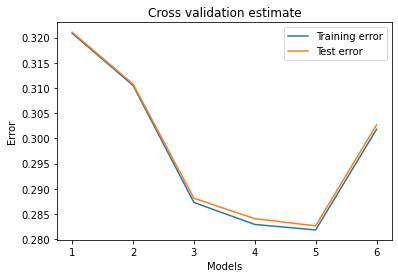

In [21]:
training_plot=[0.32086828077837004, 0.3105266199987156, 0.2873065313724231, 0.2829368698221052, 0.2818547299466958, 0.3018239034101856]
x_axis1=[1,2,3,4,5,6]
plt.plot(x_axis1, training_plot, label="Training error")
test_plot=    [0.32107122214372874, 0.31080341660779653, 0.2881304990045597,0.2840922227217263, 0.28265878877400297,0.3026986063836619]
x_axis2=[1,2,3,4,5,6]
plt.plot(x_axis2, test_plot, label="Test error")
plt.xlabel("Models")
plt.ylabel("Error")
plt.title("Cross validation estimate")
plt.legend()
plt.show

In [19]:
#creating the labels
Y_train1, Y_test1, Y_train2, Y_test2, Y_train3, Y_test3, Y_train4, Y_test4, Y_train5, Y_test5, Y_train6, Y_test6, Y_train7, Y_test7=create_labels(Ytrain, Ytest)

In [20]:
np.shape(Y_train1)

(389278,)

In [22]:
#weights for each class
w1=[]
w2=[]
w3=[]
w4=[]
w5=[]
w6=[]
w7=[]

#segni per ogni classe
sgn1=np.full(len(Ytrain),0)
sgn2=np.full(len(Ytrain),0)
sgn3=np.full(len(Ytrain),0)
sgn4=np.full(len(Ytrain),0)
sgn5=np.full(len(Ytrain),0)
sgn6=np.full(len(Ytrain),0)
sgn7=np.full(len(Ytrain),0)

#initial probabilities equal for all classes
P1=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P2=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P3=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P4=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P5=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P6=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P7=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])

#stumps for each class
stumps1=[]
stumps2=[]
stumps3=[]
stumps4=[]
stumps5=[]
stumps6=[]
stumps7=[]



#class 1
for t in range(500):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit1=weak_learner.fit(Xtrain, Y_train1, sample_weight=P1)
    stumps1.append(fit1)
    predictions1=fit1.predict(Xtrain)
    error1=sum(P1*(np.not_equal(Y_train1, predictions1).astype(int)))
    if error1 == 0.5:
        stumps1=stumps1[0:t-1]
        break
    if error1 == 1:
        stumps1 = [fit1]
        sgn1 = -(predictions1)
        break
    if error1 == 0:
        stumps1 = [fit1]
        sgn1=predictions1
        break
    w1.append(0.5*(np.log((1-error1)/error1)))
    sgn1=sgn1+(w1[t]*predictions1)
    P1=(P1*np.exp(-1*w1[t]*Y_train1*predictions1))/sum((np.exp(-1*w1[t]*Y_train1*predictions1))*P1)
sgn1=sgn1/len(stumps1)
    
    
#class 2
for t in range(600):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit2=weak_learner.fit(Xtrain, Y_train2, sample_weight=P2)
    stumps2.append(fit2)
    predictions2=fit2.predict(Xtrain)
    error2=sum(P2*(np.not_equal(Y_train2, predictions2).astype(int)))
    if error2 == 0.5:
        stumps2=stumps2[0:t-1]
        break
    if error2 == 1:
        stumps2 = [fit2]
        sgn2 = -(predictions2)
        break
    if error2 == 0:
        stumps2 = [fit2]
        sgn2=predictions2
        break
    w2.append(0.5*(np.log((1-error2)/error2)))
    sgn2=sgn2+(w2[t]*predictions2)
    P2=(P2*np.exp(-1*w2[t]*Y_train2*predictions2))/sum((np.exp(-1*w2[t]*Y_train2*predictions2))*P2)
sgn2=sgn2/len(stumps2)   
    
#class 3
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit3=weak_learner.fit(Xtrain, Y_train3, sample_weight=P3)
    stumps3.append(fit3)
    predictions3=fit3.predict(Xtrain)
    error3=sum(P3*(np.not_equal(Y_train3, predictions3).astype(int)))
    if error3 == 0.5:
        stumps3=stumps3[0:t-1]
        break
    if error3 == 1:
        stumps3 = [fit3]
        sgn3 = -(predictions3)
        break
    if error3 == 0:
        stumps3 = [fit3]
        sgn3=predictions3
        break
    w3.append(0.5*(np.log((1-error3)/error3)))
    sgn3=sgn3+(w3[t]*predictions3)
    P3=(P3*np.exp(-1*w3[t]*Y_train3*predictions3))/sum((np.exp(-1*w3[t]*Y_train3*predictions3))*P3)
sgn3=sgn3/len(stumps3)   
    
#class 4
for t in range(100):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit4=weak_learner.fit(Xtrain, Y_train4, sample_weight=P4)
    stumps4.append(fit4)
    predictions4=fit4.predict(Xtrain)
    error4=sum(P4*(np.not_equal(Y_train4, predictions4).astype(int)))
    if error4 == 0.5:
        stumps4=stumps4[0:t-1]
        break
    if error4 == 1:
        stumps4 = [fit4]
        sgn4 = -(predictions4)
        break
    if error4 == 0:
        stumps4 = [fit4]
        sgn4=predictions4
        break
    w4.append(0.5*(np.log((1-error4)/error4)))
    sgn4=sgn4+(w4[t]*predictions4)
    P4=(P4*np.exp(-1*w4[t]*Y_train4*predictions4))/sum((np.exp(-1*w4[t]*Y_train4*predictions4))*P4)
sgn4=sgn4/len(stumps4)   
    
#class 5
for t in range(150):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit5=weak_learner.fit(Xtrain, Y_train5, sample_weight=P5)
    stumps5.append(fit5)
    predictions5=fit5.predict(Xtrain)
    error5=sum(P5*(np.not_equal(Y_train5, predictions5).astype(int)))
    if error5 == 0.5:
        stumps5=stumps5[0:t-1]
        break
    if error5 == 1:
        stumps5 = [fit5]
        sgn5 = -(predictions5)
        break
    if error5 == 0:
        stumps5 = [fit5]
        sgn5=predictions5
        break
    w5.append(0.5*(np.log((1-error5)/error5)))
    sgn5=sgn5+(w5[t]*predictions5)
    P5=(P5*np.exp(-1*w5[t]*Y_train5*predictions5))/sum((np.exp(-1*w5[t]*Y_train5*predictions5))*P5)
sgn5=sgn5/len(stumps5)    

#class 6  
for t in range(170):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit6=weak_learner.fit(Xtrain, Y_train6, sample_weight=P6)
    stumps6.append(fit6)
    predictions6=fit6.predict(Xtrain)
    error6=sum(P6*(np.not_equal(Y_train6, predictions6).astype(int)))
    if error6 == 0.5:
        stumps6=stumps6[0:t-1]
        break
    if error6 == 1:
        stumps6 = [fit6]
        sgn6 = -(predictions6)
        break
    if error6 == 0:
        stumps6 = [fit6]
        sgn6=predictions6
        break
    w6.append(0.5*(np.log((1-error6)/error6)))
    sgn6=sgn6+(w6[t]*predictions6)
    P6=(P6*np.exp(-1*w6[t]*Y_train6*predictions6))/sum((np.exp(-1*w6[t]*Y_train6*predictions6))*P6)
sgn6=sgn6/len(stumps6)       
    
#class 7
for t in range(180):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=t, max_depth=1)
    fit7=weak_learner.fit(Xtrain, Y_train7, sample_weight=P7)
    stumps7.append(fit7)
    predictions7=fit7.predict(Xtrain)
    error7=sum(P7*(np.not_equal(Y_train7, predictions7).astype(int)))
    if error7 == 0.5:    
        stumps7=stumps7[0:t-1]
        break
    if error7 == 1:
        stumps7 = [fit7]
        sgn7 = -(predictions7)
        break
    if error7 == 0:
        stumps7 = [fit7]
        sgn7=predictions7
        break
    w7.append(0.5*(np.log((1-error7)/error7)))
    sgn7=sgn7+(w7[t]*predictions7)
    P7=(P7*np.exp(-1*w7[t]*Y_train7*predictions7))/sum((np.exp(-1*w7[t]*Y_train7*predictions7))*P7)
sgn7=sgn7/len(stumps7)


In [25]:
#traininge set
sgn_classes_Train=pd.DataFrame(sgn1, columns=["sgn1"])
sgn_classes_Train["sgn2"]=sgn2
sgn_classes_Train["sgn3"]=sgn3
sgn_classes_Train["sgn4"]=sgn4
sgn_classes_Train["sgn5"]=sgn5
sgn_classes_Train["sgn6"]=sgn6
sgn_classes_Train["sgn7"]=sgn7

In [26]:
#training error and predictions
training_error, training_predictions=compute_error(sgn_classes_Train, Ytrain)
training_error

0.28115896608593344

In [ ]:
1-0.28115896608593344

In [ ]:
#confusion matrix on the training set
sklearn.metrics.confusion_matrix(Ytrain, training_predictions)

In [ ]:
#predictions test set

sgn_test1=np.full(len(Ytest),0)
sgn_test2=np.full(len(Ytest),0)
sgn_test3=np.full(len(Ytest),0)
sgn_test4=np.full(len(Ytest),0)
sgn_test5=np.full(len(Ytest),0)
sgn_test6=np.full(len(Ytest),0)
sgn_test7=np.full(len(Ytest),0)

#class 1
if error1 == 0:
    predictions_test1=stumps1[0].predict(Xtest)
    sgn_test1=predictions_test1
        
if error1 == 1:
    predictions_test1=stumps1[0].predict(Xtest)
    sgn_test1= -(predictions_test1)
        
else:
    for t in range(len(stumps1)):
        predictions_test1=stumps1[t].predict(Xtest)
        sgn_test1=sgn_test1+(w1[t]*predictions_test1)
    sgn_test1=sgn_test1/len(stumps1)

#class 2
if error2 == 0:
    predictions_test2=stumps2[0].predict(Xtest)
    sgn_test2=predictions_test2
        
if error2 == 1:
    predictions_test2=stumps2[0].predict(Xtest)
    sgn_test2= -(predictions_test2)
        
else:
    for t in range(len(stumps2)):
        predictions_test2=stumps2[t].predict(Xtest)
        sgn_test2=sgn_test2+(w2[t]*predictions_test2)
    sgn_test2=sgn_test2/len(stumps2)

#class 3
if error3 == 0:
    predictions_test=stumps3[0].predict(Xtest)
    sgn_test3=predictions_test3
        
if error3 == 1:
    predictions_test3=stumps3[0].predict(Xtest)
    sgn_test3= -(predictions_test3)
        
else:
    for t in range(len(stumps3)):
        predictions_test3=stumps3[t].predict(Xtest)
        sgn_test3=sgn_test3+(w3[t]*predictions_test3)
    sgn_test3=sgn_test3/len(stumps3)

#class 4
if error4 == 0:
    predictions_test4=stumps4[0].predict(Xtest)
    sgn_test4=predictions_test4
        
if error4 == 1:
    predictions_test4=stumps4[0].predict(Xtest)
    sgn_test4= -(predictions_test4)
        
else:
    for t in range(len(stumps4)):
        predictions_test4=stumps4[t].predict(Xtest)
        sgn_test4=sgn_test4+(w4[t]*predictions_test4)
    sgn_test4=sgn_test4/len(stumps4)

#class 5
if error5 == 0:
    predictions_test5=stumps5[0].predict(Xtest)
    sgn_test5=predictions_test5
        
if error5 == 1:
    predictions_test5=stumps5[0].predict(Xtest)
    sgn_test5= -(predictions_test5)
        
else:
    for t in range(len(stumps5)):
        predictions_test5=stumps5[t].predict(Xtest)
        sgn_test5=sgn_test5+(w5[t]*predictions_test5)
    sgn_test5=sgn_test5/len(stumps5)

#class 6
if error6 == 0:
    predictions_test6=stumps6[0].predict(Xtest)
    sgn_test6=predictions_test6
        
if error6 == 1:
    predictions_test6=stumps6[0].predict(Xtest)
    sgn_test6= -(predictions_test6)
        
else:
    for t in range(len(stumps6)):
        predictions_test6=stumps6[t].predict(Xtest)
        sgn_test6=sgn_test6+(w6[t]*predictions_test6)
    sgn_test6=sgn_test6/len(stumps6)

#class 7
if error7 == 0:
    predictions_test7=stumps7[0].predict(Xtest)
    sgn_test7=predictions_test7
        
if error7 == 1:
    predictions_test7=stumps7[0].predict(Xtest)
    sgn_test7= -(predictions_test7)
        
else:
    for t in range(len(stumps7)):
        predictions_test7=stumps7[t].predict(Xtest)
        sgn_test7=sgn_test7+(w7[t]*predictions_test7)
    sgn_test7=sgn_test7/len(stumps7)

In [ ]:
#test error and predictions
test_error, test_predictions=compute_error(sgn_classes_Test, Ytest)
test_error

In [ ]:
1-0.2812177287283424

In [ ]:
#confusion matrix on the test set
sklearn.metrics.confusion_matrix(Ytest, test_predictions)

In [24]:
np.unique(Ytest, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([69907, 93489, 11799,   907,  3133,  5731,  6768], dtype=int64))

In [ ]:
print(len(stumps1),len(stumps2), len(stumps3), len(stumps4), len(stumps5), len(stumps6), len(stumps7))

In [ ]:
1-((49662+74824+9730+478+396+2725)/191734)

In [ ]:
#Model 4 with 400 stumps for each class
#weights for each class
w1=[]
w2=[]
w3=[]
w4=[]
w5=[]
w6=[]
w7=[]

#segni per ogni classe
sgn1=np.full(len(Ytrain),0)
sgn2=np.full(len(Ytrain),0)
sgn3=np.full(len(Ytrain),0)
sgn4=np.full(len(Ytrain),0)
sgn5=np.full(len(Ytrain),0)
sgn6=np.full(len(Ytrain),0)
sgn7=np.full(len(Ytrain),0)

#initial probabilities equal for all classes
P1=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P2=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P3=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P4=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P5=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P6=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])
P7=np.full(np.shape(Xtrain)[0],1/np.shape(Xtrain)[0])

#stumps for each class
stumps1=[]
stumps2=[]
stumps3=[]
stumps4=[]
stumps5=[]
stumps6=[]
stumps7=[]



#class 1
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit1=weak_learner.fit(Xtrain, Y_train1, sample_weight=P1)
    stumps1.append(fit1)
    predictions1=fit1.predict(Xtrain)
    error1=sum(P1*(np.not_equal(Y_train1, predictions1).astype(int)))
    if error1 == 0.5:
        stumps1=stumps1[0:t-1]
        break
    if error1 == 1:
        stumps1 = [fit1]
        sgn1 = -(predictions1)
        break
    if error1 == 0:
        stumps1 = [fit1]
        sgn1=predictions1
        break
    w1.append(0.5*(np.log((1-error1)/error1)))
    sgn1=sgn1+(w1[t]*predictions1)
    P1=(P1*np.exp(-1*w1[t]*Y_train1*predictions1))/sum((np.exp(-1*w1[t]*Y_train1*predictions1))*P1)
sgn1=sgn1/len(stumps1)
    
    
#class 2
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit2=weak_learner.fit(Xtrain, Y_train2, sample_weight=P2)
    stumps2.append(fit2)
    predictions2=fit2.predict(Xtrain)
    error2=sum(P2*(np.not_equal(Y_train2, predictions2).astype(int)))
    if error2 == 0.5:
        stumps2=stumps2[0:t-1]
        break
    if error2 == 1:
        stumps2 = [fit2]
        sgn2 = -(predictions2)
        break
    if error2 == 0:
        stumps2 = [fit2]
        sgn2=predictions2
        break
    w2.append(0.5*(np.log((1-error2)/error2)))
    sgn2=sgn2+(w2[t]*predictions2)
    P2=(P2*np.exp(-1*w2[t]*Y_train2*predictions2))/sum((np.exp(-1*w2[t]*Y_train2*predictions2))*P2)
sgn2=sgn2/len(stumps2)   
    
#class 3
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit3=weak_learner.fit(Xtrain, Y_train3, sample_weight=P3)
    stumps3.append(fit3)
    predictions3=fit3.predict(Xtrain)
    error3=sum(P3*(np.not_equal(Y_train3, predictions3).astype(int)))
    if error3 == 0.5:
        stumps3=stumps3[0:t-1]
        break
    if error3 == 1:
        stumps3 = [fit3]
        sgn3 = -(predictions3)
        break
    if error3 == 0:
        stumps3 = [fit3]
        sgn3=predictions3
        break
    w3.append(0.5*(np.log((1-error3)/error3)))
    sgn3=sgn3+(w3[t]*predictions3)
    P3=(P3*np.exp(-1*w3[t]*Y_train3*predictions3))/sum((np.exp(-1*w3[t]*Y_train3*predictions3))*P3)
sgn3=sgn3/len(stumps3)   
    
#class 4
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit4=weak_learner.fit(Xtrain, Y_train4, sample_weight=P4)
    stumps4.append(fit4)
    predictions4=fit4.predict(Xtrain)
    error4=sum(P4*(np.not_equal(Y_train4, predictions4).astype(int)))
    if error4 == 0.5:
        stumps4=stumps4[0:t-1]
        break
    if error4 == 1:
        stumps4 = [fit4]
        sgn4 = -(predictions4)
        break
    if error4 == 0:
        stumps4 = [fit4]
        sgn4=predictions4
        break
    w4.append(0.5*(np.log((1-error4)/error4)))
    sgn4=sgn4+(w4[t]*predictions4)
    P4=(P4*np.exp(-1*w4[t]*Y_train4*predictions4))/sum((np.exp(-1*w4[t]*Y_train4*predictions4))*P4)
sgn4=sgn4/len(stumps4)   
    
#class 5
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit5=weak_learner.fit(Xtrain, Y_train5, sample_weight=P5)
    stumps5.append(fit5)
    predictions5=fit5.predict(Xtrain)
    error5=sum(P5*(np.not_equal(Y_train5, predictions5).astype(int)))
    if error5 == 0.5:
        stumps5=stumps5[0:t-1]
        break
    if error5 == 1:
        stumps5 = [fit5]
        sgn5 = -(predictions5)
        break
    if error5 == 0:
        stumps5 = [fit5]
        sgn5=predictions5
        break
    w5.append(0.5*(np.log((1-error5)/error5)))
    sgn5=sgn5+(w5[t]*predictions5)
    P5=(P5*np.exp(-1*w5[t]*Y_train5*predictions5))/sum((np.exp(-1*w5[t]*Y_train5*predictions5))*P5)
sgn5=sgn5/len(stumps5)    

#class 6  
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit6=weak_learner.fit(Xtrain, Y_train6, sample_weight=P6)
    stumps6.append(fit6)
    predictions6=fit6.predict(Xtrain)
    error6=sum(P6*(np.not_equal(Y_train6, predictions6).astype(int)))
    if error6 == 0.5:
        stumps6=stumps6[0:t-1]
        break
    if error6 == 1:
        stumps6 = [fit6]
        sgn6 = -(predictions6)
        break
    if error6 == 0:
        stumps6 = [fit6]
        sgn6=predictions6
        break
    w6.append(0.5*(np.log((1-error6)/error6)))
    sgn6=sgn6+(w6[t]*predictions6)
    P6=(P6*np.exp(-1*w6[t]*Y_train6*predictions6))/sum((np.exp(-1*w6[t]*Y_train6*predictions6))*P6)
sgn6=sgn6/len(stumps6)       
    
#class 7
for t in range(400):
    weak_learner=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=1)
    fit7=weak_learner.fit(Xtrain, Y_train7, sample_weight=P7)
    stumps7.append(fit7)
    predictions7=fit7.predict(Xtrain)
    error7=sum(P7*(np.not_equal(Y_train7, predictions7).astype(int)))
    if error7 == 0.5:    
        stumps7=stumps7[0:t-1]
        break
    if error7 == 1:
        stumps7 = [fit7]
        sgn7 = -(predictions7)
        break
    if error7 == 0:
        stumps7 = [fit7]
        sgn7=predictions7
        break
    w7.append(0.5*(np.log((1-error7)/error7)))
    sgn7=sgn7+(w7[t]*predictions7)
    P7=(P7*np.exp(-1*w7[t]*Y_train7*predictions7))/sum((np.exp(-1*w7[t]*Y_train7*predictions7))*P7)
sgn7=sgn7/len(stumps7)

In [ ]:
#traininge set
sgn_classes_Train=pd.DataFrame(sgn1, columns=["sgn1"])
sgn_classes_Train["sgn2"]=sgn2
sgn_classes_Train["sgn3"]=sgn3
sgn_classes_Train["sgn4"]=sgn4
sgn_classes_Train["sgn5"]=sgn5
sgn_classes_Train["sgn6"]=sgn6
sgn_classes_Train["sgn7"]=sgn7

In [ ]:
#training error and predictions
training_error, training_predictions=compute_error(sgn_classes_Train, Ytrain)
training_error

In [ ]:
1-0.28375865063014094

In [ ]:
#confusion matrix on the training set
sklearn.metrics.confusion_matrix(Ytrain, training_predictions)

In [ ]:
#predictions test set
    #class1
sgn_test1=np.full(len(Ytest),0)
sgn_test2=np.full(len(Ytest),0)
sgn_test3=np.full(len(Ytest),0)
sgn_test4=np.full(len(Ytest),0)
sgn_test5=np.full(len(Ytest),0)
sgn_test6=np.full(len(Ytest),0)
sgn_test7=np.full(len(Ytest),0)


if error1 == 0:
    predictions_test1=stumps1[0].predict(Xtest)
    sgn_test1=predictions_test1
        
if error1 == 1:
    predictions_test1=stumps1[0].predict(Xtest)
    sgn_test1= -(predictions_test1)
        
else:
    for t in range(len(stumps1)):
        predictions_test1=stumps1[t].predict(Xtest)
        sgn_test1=sgn_test1+(w1[t]*predictions_test1)
    sgn_test1=sgn_test1/len(stumps1)

    #class 2
if error2 == 0:
    predictions_test2=stumps2[0].predict(Xtest)
    sgn_test2=predictions_test2
        
if error2 == 1:
    predictions_test2=stumps2[0].predict(Xtest)
    sgn_test2= -(predictions_test2)
        
else:
    for t in range(len(stumps2)):
        predictions_test2=stumps2[t].predict(Xtest)
        sgn_test2=sgn_test2+(w2[t]*predictions_test2)
    sgn_test2=sgn_test2/len(stumps2)

    #class 3
if error3 == 0:
    predictions_test=stumps3[0].predict(Xtest)
    sgn_test3=predictions_test3
        
if error3 == 1:
    predictions_test3=stumps3[0].predict(Xtest)
    sgn_test3= -(predictions_test3)
        
else:
    for t in range(len(stumps3)):
        predictions_test3=stumps3[t].predict(Xtest)
        sgn_test3=sgn_test3+(w3[t]*predictions_test3)
    sgn_test3=sgn_test3/len(stumps3)

    #class 4
if error4 == 0:
    predictions_test4=stumps4[0].predict(Xtest)
    sgn_test4=predictions_test4
        
if error4 == 1:
    predictions_test4=stumps4[0].predict(Xtest)
    sgn_test4= -(predictions_test4)
        
else:
    for t in range(len(stumps4)):
        predictions_test4=stumps4[t].predict(Xtest)
        sgn_test4=sgn_test4+(w4[t]*predictions_test4)
    sgn_test4=sgn_test4/len(stumps4)

    #class 5
if error5 == 0:
    predictions_test5=stumps5[0].predict(Xtest)
    sgn_test5=predictions_test5
        
if error5 == 1:
    predictions_test5=stumps5[0].predict(Xtest)
    sgn_test5= -(predictions_test5)
        
else:
    for t in range(len(stumps5)):
        predictions_test5=stumps5[t].predict(Xtest)
        sgn_test5=sgn_test5+(w5[t]*predictions_test5)
    sgn_test5=sgn_test5/len(stumps5)

    #class 6
if error6 == 0:
    predictions_test6=stumps6[0].predict(Xtest)
    sgn_test6=predictions_test6
        
if error6 == 1:
    predictions_test6=stumps6[0].predict(Xtest)
    sgn_test6= -(predictions_test6)
        
else:
    for t in range(len(stumps6)):
        predictions_test6=stumps6[t].predict(Xtest)
        sgn_test6=sgn_test6+(w6[t]*predictions_test6)
    sgn_test6=sgn_test6/len(stumps6)

    #class 7
if error7 == 0:
    predictions_test7=stumps7[0].predict(Xtest)
    sgn_test7=predictions_test7
        
if error7 == 1:
    predictions_test7=stumps7[0].predict(Xtest)
    sgn_test7= -(predictions_test7)
        
else:
    for t in range(len(stumps7)):
        predictions_test7=stumps7[t].predict(Xtest)
        sgn_test7=sgn_test7+(w7[t]*predictions_test7)
    sgn_test7=sgn_test7/len(stumps7)

In [ ]:
sgn_classes_Test=pd.DataFrame(sgn_test1, columns=["sgn_test1"])
sgn_classes_Test["sgn_test2"]=sgn_test2
sgn_classes_Test["sgn_test3"]=sgn_test3
sgn_classes_Test["sgn_test4"]=sgn_test4
sgn_classes_Test["sgn_test5"]=sgn_test5
sgn_classes_Test["sgn_test6"]=sgn_test6
sgn_classes_Test["sgn_test7"]=sgn_test7

In [ ]:
#test error and predictions
test_error, test_predictions=compute_error(sgn_classes_Test, Ytest)
test_error

In [ ]:
1-0.2836064547758874

In [ ]:
#confusion matrix on the test set
sklearn.metrics.confusion_matrix(Ytest, test_predictions)

In [ ]:
print(len(stumps1), len(stumps2), len(stumps3), len(stumps4), len(stumps5), len(stumps6), len(stumps7))

In [ ]:
np.sum(P6)

In [ ]:
summary=forest.groupby("Cover_Type").describe()
pd.set_option('display.max_columns', None)

In [ ]:
summary

In [ ]:
summary[["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points" ]]

In [ ]:
summary1=summary.loc(axis=1)[:, ["mean", "std"]]

In [ ]:
summary1[["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points" ]]

In [ ]:
summary2=summary.loc(axis=1)[:,["mean", "count"]]
summary2[["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]]

In [4]:
3*3*32+32

320